In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [34]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [35]:
from sklearn.cluster import KMeans
wcss = []
trial_k_values = range(1,10)
for i in trial_k_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)


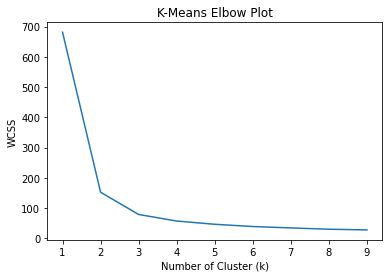

In [36]:
plt.plot(trial_k_values, wcss)
plt.title("K-Means Elbow Plot")
plt.xlabel('Number of Cluster (k)')
plt.ylabel('WCSS')
plt.xticks(trial_k_values)
plt.show()

Taking the lower WCSS, the best number of Clusters based on Elbow Method: 3

In [37]:
kmeans = KMeans(n_clusters = 3)
kmeans_model = kmeans.fit(iris_df)

In [38]:
y_kmeans = kmeans_model.predict(iris_df)
iris_df['Cluster'] = y_kmeans
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


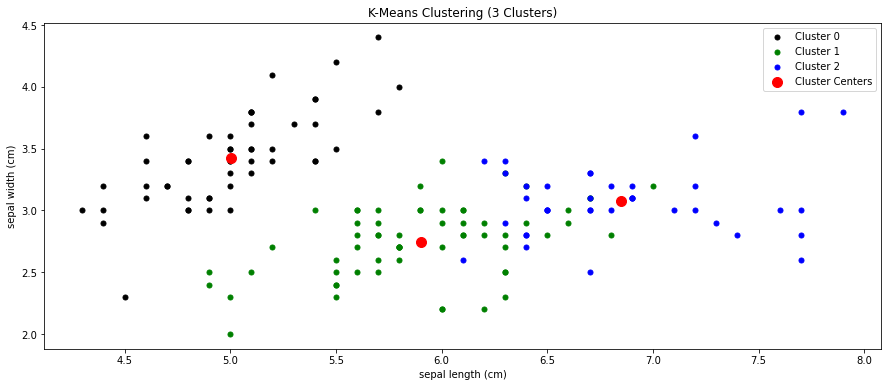

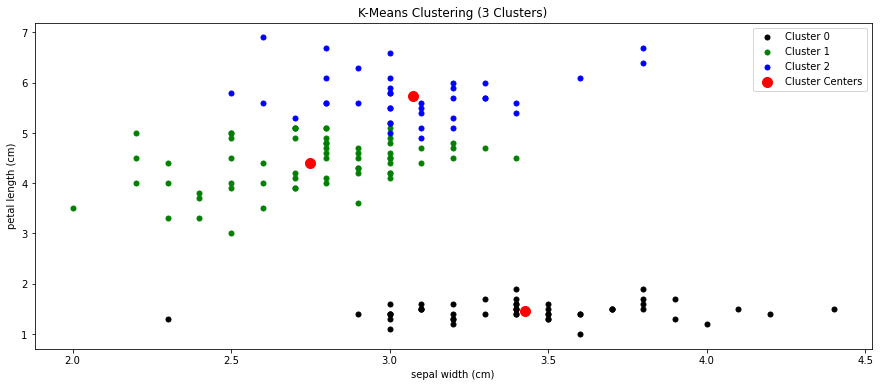

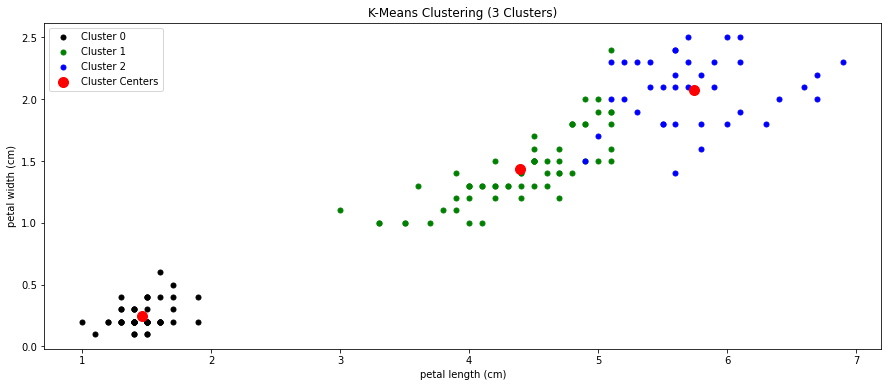

In [39]:
x = iris_df.iloc[:,range(0,4)].values
colors = ['black','green', 'blue']
for j in range(0,3):
    plt.figure(figsize=(15,6))
    for i in range(0,3):
        plt.scatter(x[y_kmeans == i, j], x[y_kmeans == i, j+1], c=colors[i], s= 25, label='Cluster ' + str(i))

    # Plot the cluster centroids/center
    cluster_centers = kmeans_model.cluster_centers_
    plt.scatter(cluster_centers[:,j], cluster_centers[:,j+1], c='red', s=100, label="Cluster Centers")

    plt.xlabel(iris.feature_names[j])
    plt.ylabel(iris.feature_names[j+1])
    plt.title('K-Means Clustering (3 Clusters)')
    plt.legend()
    plt.show()